In [77]:
#work on insurance.csv file

In [78]:
#classification ALgorithm :  
#1. Logistic Regression (Binary Classifier) means  there are 2 classes : yes/no
#Logistic Regression work on concept of sigmoid function or logit function

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [80]:
#to load dataset 
df=pd.read_csv("insurance.csv")
df.head() #to show first 5 records

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [81]:
#here target meansoutput variable : insuranceclaim (1 /0)
df["insuranceclaim"].unique()   #how many categories in insuranceclaim column

array([1, 0], dtype=int64)

In [82]:
#How many samples of 1's and 0's category
df['insuranceclaim'].value_counts()

insuranceclaim
1    783
0    555
Name: count, dtype: int64

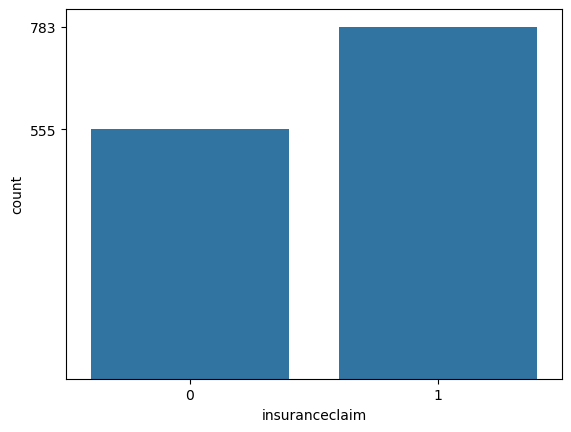

In [83]:
#Visualise 
sns.countplot(data=df,x='insuranceclaim')
f=df['insuranceclaim'].value_counts()
plt.yticks(f)
plt.show()

In [84]:
#How many rows and columns in given dataset
df.shape

(1338, 8)

In [85]:
#to check null values in given dataset
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

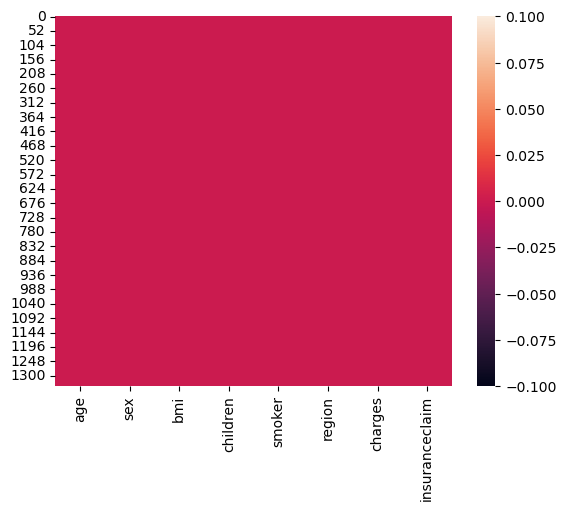

In [86]:
#visualize null values
sns.heatmap(df.isnull())
plt.show()

In [87]:
#to check datatypes
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [88]:
#To check duplicates rows 
df.duplicated().sum()

1

In [89]:
#to show duplicates rows
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [90]:
#To remove duplicates row permanently : drop_duplicates()
df.drop_duplicates(inplace=True)

In [91]:
#To check duplicates rows 
df.duplicated().sum()

0

In [92]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [93]:
df['sex'].value_counts()

sex
1    675
0    662
Name: count, dtype: int64

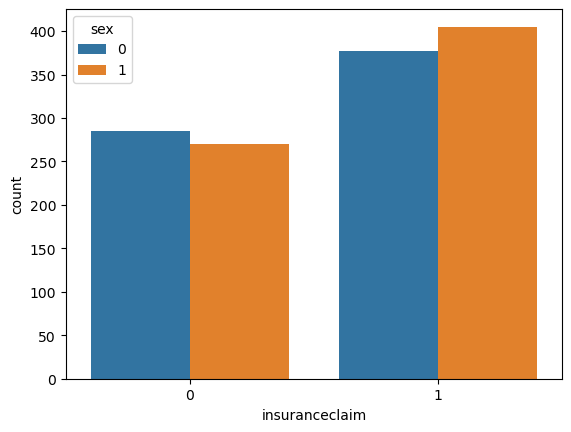

In [94]:
#to check the input sex is imp features to predict the output insuranceclaim
sns.countplot(data=df,x='insuranceclaim',hue='sex')
#here x=output variable and hue=input variable(categorical type)
plt.show()

In [95]:
#sex : female  : 0
#male : 1
#clearly show these graph , sex input is not imp to predict the output insuranceclaim

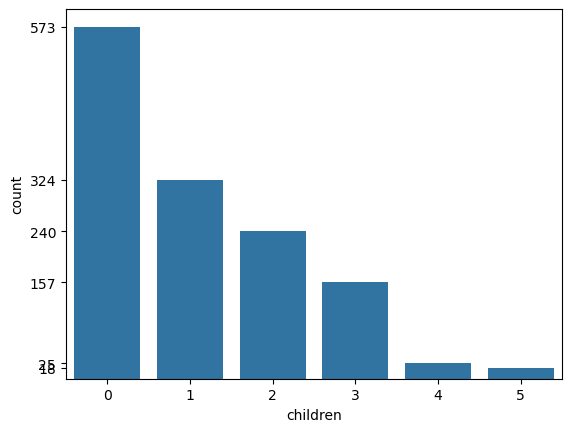

In [96]:
sns.countplot(data=df,x='children')
f=df['children'].value_counts()
plt.yticks(f)
plt.show()

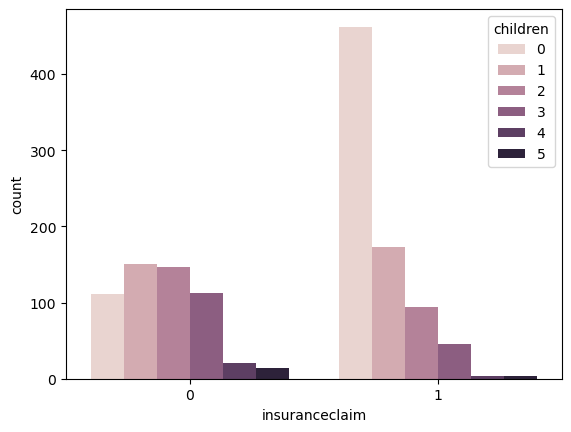

In [97]:
#to check the input children is imp features to predict the output insuranceclaim
sns.countplot(data=df,x='insuranceclaim',hue='children')
#here x=output variable and hue=input variable(categorical type)
plt.show()

In [98]:
#clearly show these graph , children input is not imp to predict the output insuranceclaim

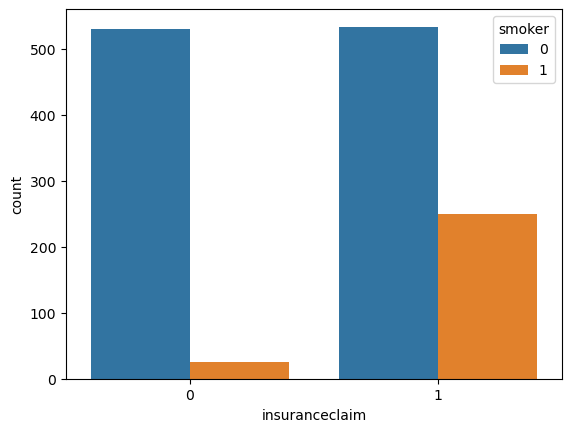

In [99]:
#to check the input smoker is imp features to predict the output insuranceclaim
sns.countplot(data=df,x='insuranceclaim',hue='smoker')
#here x=output variable and hue=input variable(categorical type)
plt.show()

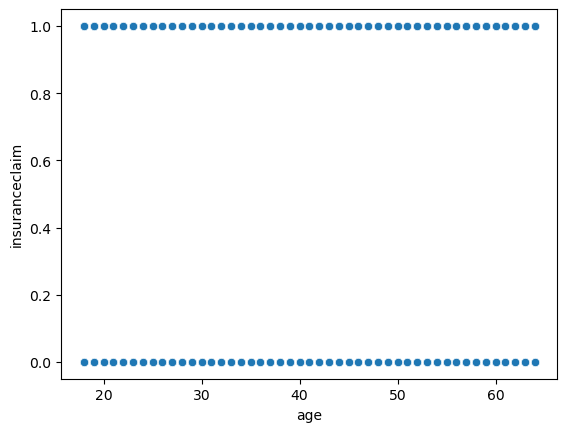

In [100]:
#to check the input age is imp features to predict the output insuranceclaim
#age input contineous numeric  : scatterplot
sns.scatterplot(data=df,x='age',y='insuranceclaim')
#here x=input variable and y=output
plt.show()

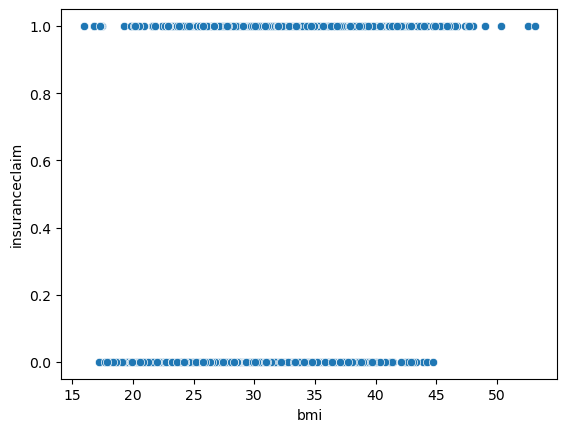

In [101]:
#to check the input bmi is imp features to predict the output insuranceclaim
#age input contineous numeric  : scatterplot
sns.scatterplot(data=df,x='bmi',y='insuranceclaim')
#here x=input variable and y=output
plt.show()

In [102]:
#select input and output from given dataset
X=df.drop("insuranceclaim",axis=1) #input variable
Y=df['insuranceclaim'] #output

In [103]:
    X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [104]:
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [105]:
#train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=3)

In [106]:
X_train.shape,X_test.shape

((668, 7), (669, 7))

In [107]:
X_train.head()

,age,sex,bmi,children,smoker,region,charges
872,42,1,24.86,0,0,2,5966.8874
640,33,1,42.40,5,0,3,6666.2430
1131,27,1,45.90,2,0,3,3693.4280
887,36,0,30.02,0,0,1,5272.1758
518,35,0,31.00,1,0,3,5240.7650


In [108]:
#Apply Scaling : StandardScaler
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [109]:
Y_train

872     0
640     0
1131    1
887     1
518     0
       ..
790     1
256     1
969     0
953     1
1274    1
Name: insuranceclaim, Length: 668, dtype: int64

In [126]:
#create function
def create_model(model):
    #trian the model with 70% data
    model.fit(X_train,Y_train)
    #to test the model with 30% data
    Y_pred=lr.predict(X_test)
    #generate report
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix (Y_test,Y_pred))
    return model

NameError: name 'Y_pred' is not defined

In [111]:
#model create with the help of Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [112]:
#Create the object of LogisticRegression class
lr=LogisticRegression()

In [113]:
#call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       265
           1       0.90      0.90      0.90       404

    accuracy                           0.88       669
   macro avg       0.87      0.87      0.87       669
weighted avg       0.88      0.88      0.88       669

[[226  39]
 [ 42 362]]


In [114]:
#find the score :-
#There are 4 types of score in classification Algorithm
#1. Recall score   2. precision score     3. F1-score   4. Accuracy

In [115]:
#Limitation of Logistic Regression :

#features do not automatic selected with the help of Logistic Regression .
#SO use next classification ALgorithm : DecisionTree Classifier 

In [116]:
#In Logistic regression : got score(Recall -1) : 0.90 means 90%

In [117]:
#USe 2nd classification Algorithm : DecisionTreeClassifier  inbuilt class

In [118]:
#call DecisionTreeClassifier class --> outer class tree -->sklearn package
from sklearn.tree import DecisionTreeClassifier

In [119]:
#create the object of class DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1) #bydefualt use gini index (formula : 1-P**2-Q**2)
#call function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       265
           1       0.90      0.90      0.90       404

    accuracy                           0.88       669
   macro avg       0.87      0.87      0.87       669
weighted avg       0.88      0.88      0.88       669

[[226  39]
 [ 42 362]]


In [120]:
#to show information gain of each input features  
#use inbuilt attributes feature_importances_  of DecisionTreeClassifier class

IG=dt.feature_importances_

col=X.columns  #columns inbuilt attributes
#create a dictionary 
dict={'Input Column':col,'Information Gain':IG}
df2=pd.DataFrame(dict)
df2

,Input Column,Information Gain
0,age,0.078750
1,sex,0.000000
2,bmi,0.398023
3,children,0.374644
4,smoker,0.144012
5,region,0.000000
6,charges,0.004570


In [121]:
#sorting df2 with the help of IG
df2.sort_values("Information Gain",ascending=False,ignore_index=True)

,Input Column,Information Gain
0,bmi,0.398023
1,children,0.374644
2,smoker,0.144012
3,age,0.078750
4,charges,0.004570
5,sex,0.000000
6,region,0.000000


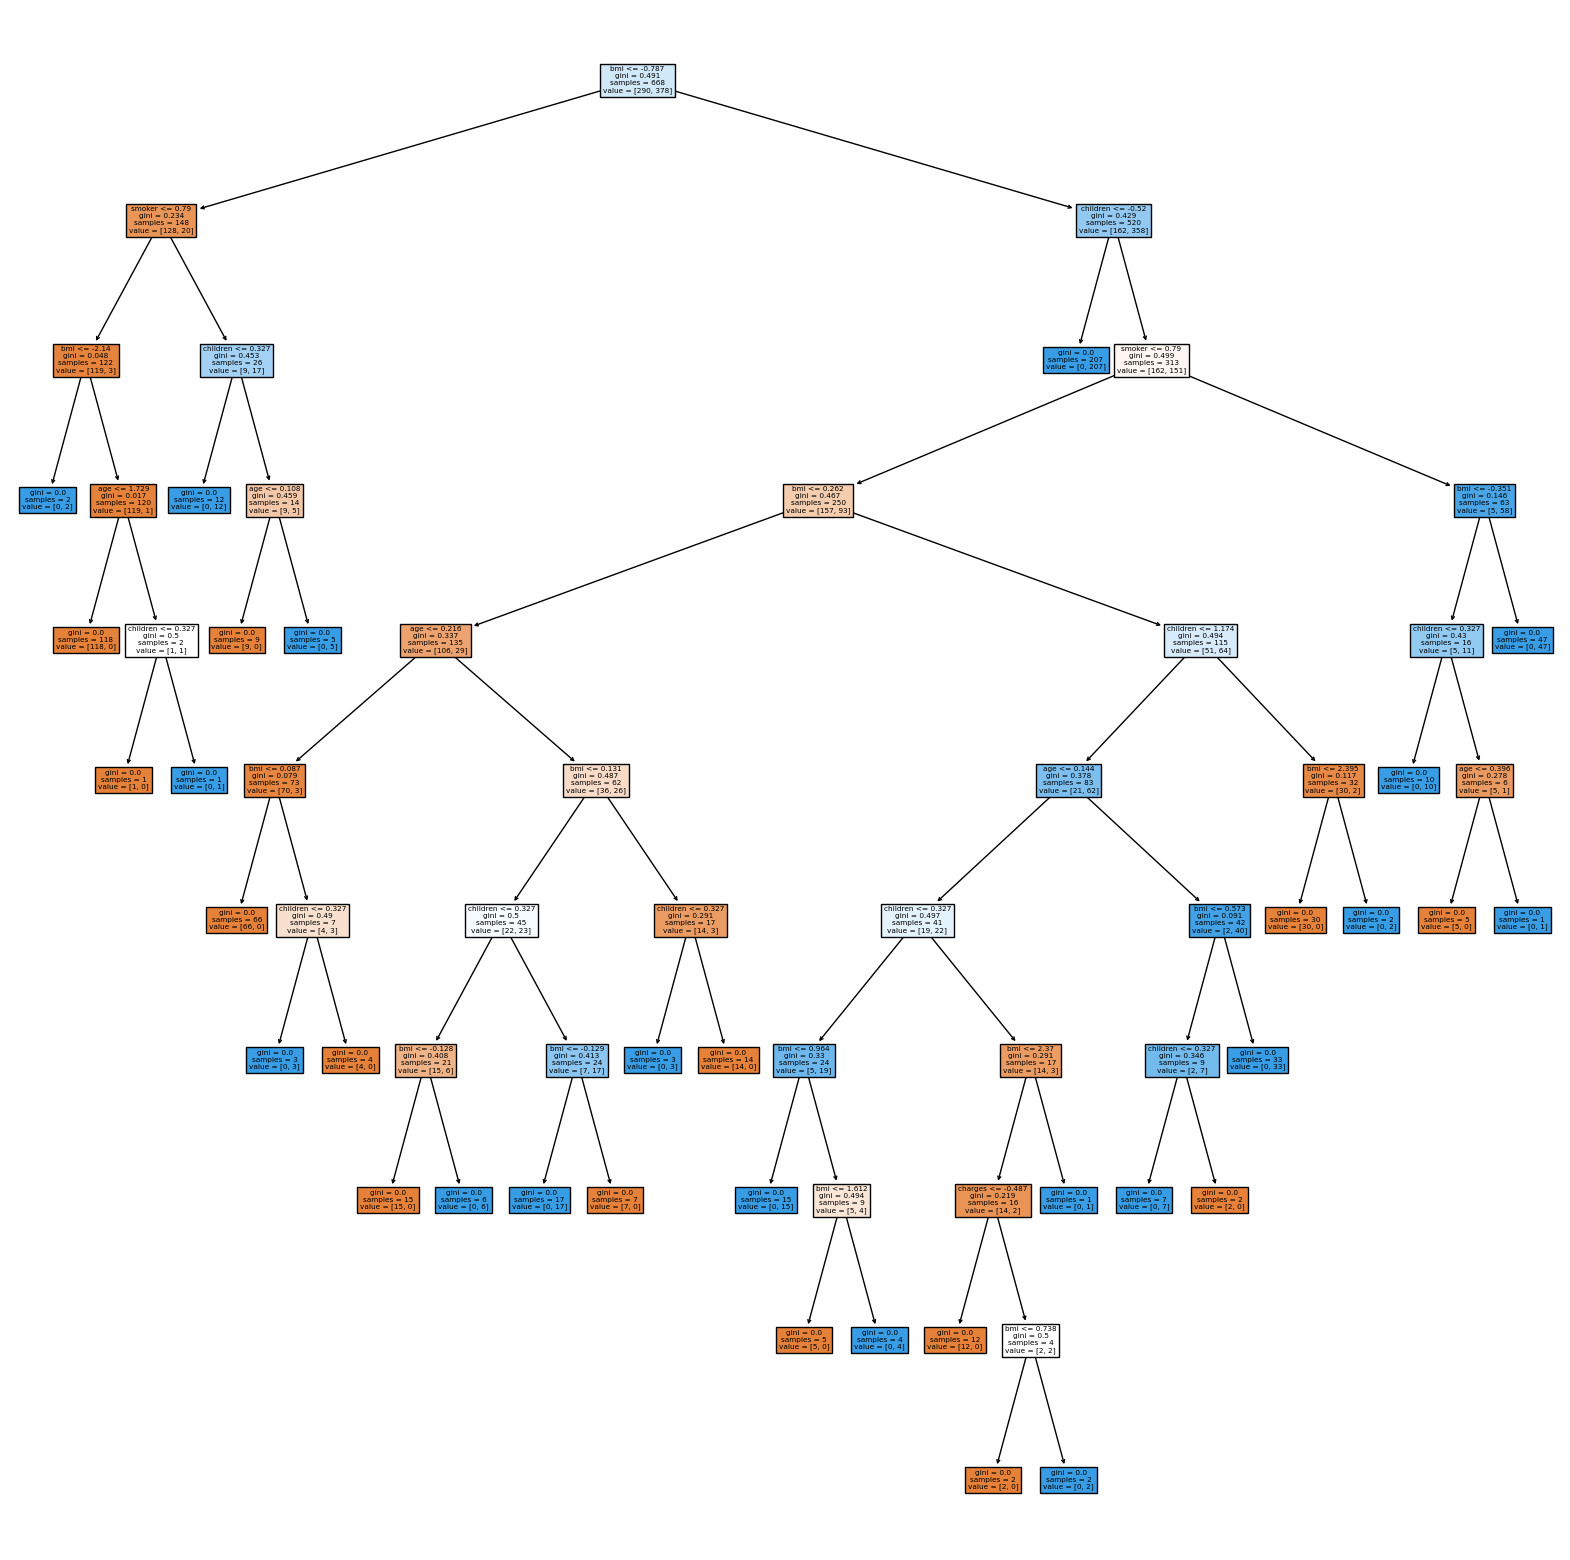

In [122]:
#create a tree 
from sklearn import tree
features=X.columns #input features
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)
plt.show()